<a href="https://colab.research.google.com/github/JuliusOkanta/ML_DataExploration/blob/main/PCA_IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis
=======


## Clasifying Flowers

Exploring dataset

In [2]:
import numpy as np
from sklearn import datasets

In [6]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

In [7]:
m, n = x.shape
print("# Samples: ", m)
print("# Features: ", n)

print(x[:10])

print(y[:10])
print(np.unique(y))

# Samples:  150
# Features:  4
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
[0 1 2]


## Preprocessing

Standardising the data using StandardScaler from sklearn

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
print("Means: ", scaler.mean_)
print("Variances: ", scaler.var_)

xcentered = scaler.transform(x)
print("Some of our data :\n", xcentered[:5])

xcentered = scaler.fit_transform(x)
print("See that the results is the same if we do everything in a single go :\n", xcentered[:10])

Means:  [5.84333333 3.05733333 3.758      1.19933333]
Variances:  [0.68112222 0.18871289 3.09550267 0.57713289]
Some of our data :
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
See that the results is the same if we do everything in a single go :
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


## PCA Calculation

In [14]:
# Calculating the principal components using PCA class of sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(xcentered)

print("These are the calculated components: \n", pca.components_)
print("The components we have found explain the following  % of variance: \n", pca.explained_variance_ratio_)

xnew2 = pca.transform(xcentered)

print("Original size of our dataset: ", xcentered.shape)
print("New size of our dataset: ", xnew2.shape)

These are the calculated components: 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]]
The components we have found explain the following  % of variance: 
 [0.72962445 0.22850762 0.03668922]
Original size of our dataset:  (150, 4)
New size of our dataset:  (150, 3)


In [15]:
# See some of the samples
print("Some of our new samples: \n", xnew2[:10])

Some of our new samples: 
 [[-2.26470281  0.4800266   0.12770602]
 [-2.08096115 -0.67413356  0.23460885]
 [-2.36422905 -0.34190802 -0.04420148]
 [-2.29938422 -0.59739451 -0.09129011]
 [-2.38984217  0.64683538 -0.0157382 ]
 [-2.07563095  1.48917752 -0.02696829]
 [-2.44402884  0.0476442  -0.3354704 ]
 [-2.23284716  0.22314807  0.0886955 ]
 [-2.33464048 -1.11532768 -0.14507686]
 [-2.18432817 -0.46901356  0.25376557]]


## Plotting the results

With xnew2 containing 3 features, let's create a 3D plot

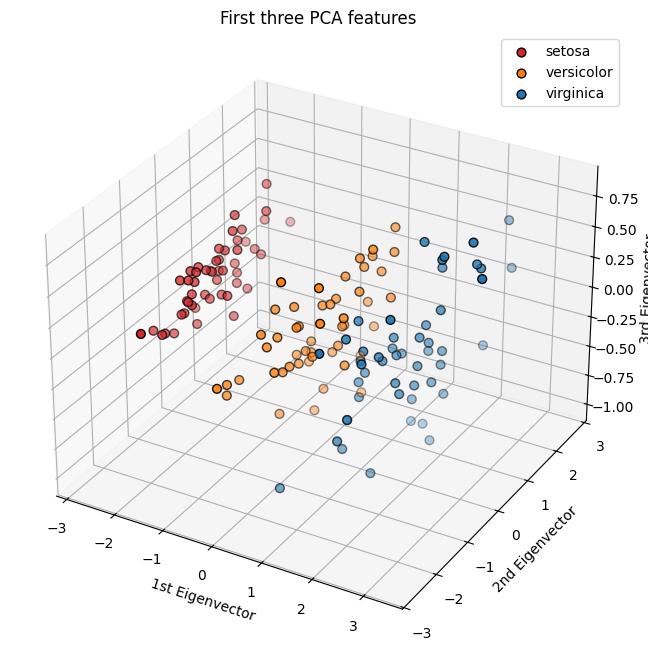

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

def plot3DScatter(x, y):
  fig = plt.figure(figsize = (10, 8))
  ax = fig.add_subplot(111, projection = "3d")

  # Plotting the training points
  for c, name, col in zip(set(y), iris.target_names, ["tab:red", "tab:orange", "tab:blue"]):
    ax.scatter(x[y == c, 0], x[y == c, 1], x[y == c, 2], c = col, label = name, edgecolor = "k", s = 40)

  ax.set_title("First three PCA features")
  ax.set_xlabel("1st Eigenvector")
  ax.set_ylabel("2nd Eigenvector")
  ax.set_zlabel("3rd Eigenvector")
  ax.legend()
  plt.show()

plot3DScatter(xnew2, y)

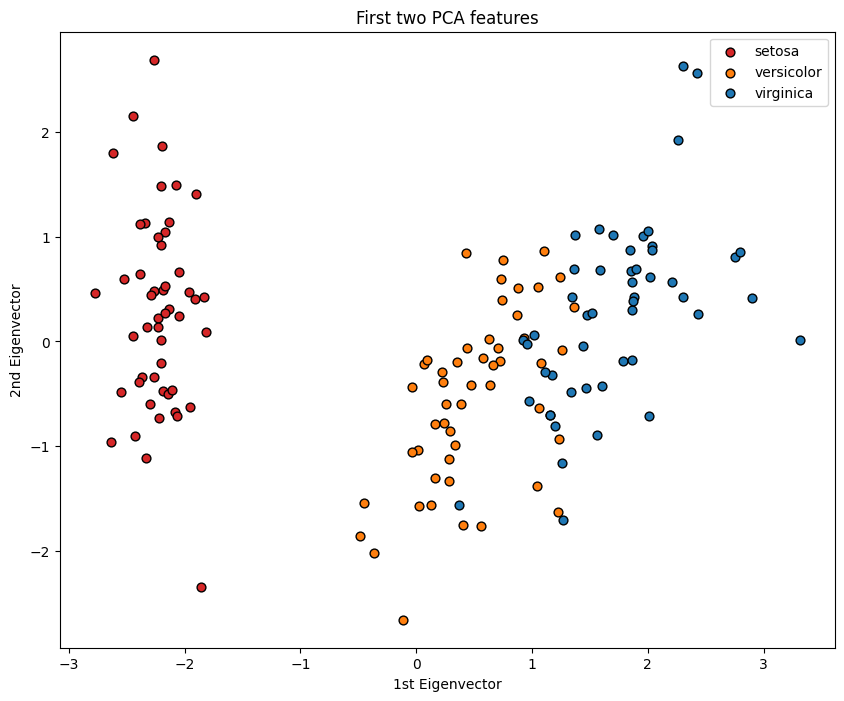

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

def plot2DScatter(x, y):
  fig = plt.figure(figsize = (10, 8))
  ax = fig.add_subplot(111)

  # Plotting the training points
  for c, name, col in zip(set(y), iris.target_names, ["tab:red", "tab:orange", "tab:blue"]):
    ax.scatter(x[y == c, 0], x[y == c, 1], c = col, label = name, edgecolor = "k", s = 40)

  ax.set_title("First two PCA features")
  ax.set_xlabel("1st Eigenvector")
  ax.set_ylabel("2nd Eigenvector")
  ax.legend()
  plt.show()

plot2DScatter(xnew2, y)